In [24]:
#import the pandas library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr,spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler 

#load the CSV file into a pandas dataframe 
df = pd.read_csv('Project1Data.csv' ) 
df.head(10)


,id,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,salary_greater_than_100k
0,1,27,non_government,bachelors_degree,married,0,3,1,0,0,40,20,0.0
1,2,44,government_local,high_school,divorced,2,3,0,0,0,40,20,0.0
2,3,35,non_government,high_school,married,10,3,1,0,0,40,20,0.0
3,4,19,government_federal,some_college,never_married,4,3,1,0,0,20,5,0.0
4,5,42,non_government,high_school,married,8,3,1,0,0,30,20,0.0
5,6,32,non_government,high_school,married,7,3,0,0,0,20,20,0.0
6,7,45,government_state,masters_degree,married,1,3,1,0,0,60,20,1.0
7,8,27,non_government,associates_degree_vocational,divorced,2,3,0,0,0,40,20,0.0
8,9,29,non_government,some_college,married,2,3,0,0,0,40,20,1.0
9,10,36,non_government,associates_degree_academic,never_married,5,3,0,0,0,40,20,0.0


In [25]:
#Data Exploration
n_records = df.shape[0]
n_greater_100k = df[df['salary_greater_than_100k']== 1].shape[0]
n_less_100k = df[df['salary_greater_than_100k']== 0].shape[0]
positive_precentage = (n_greater_100k/n_records) * 100
print("number of records : {}".format(n_records))
print("people making more than 100k:{}".format(n_greater_100k))
print("people making less than 100k:{}".format(n_less_100k))
print("Percentage of people making more than 100k:{}".format(positive_precentage))

#summary stats
df.describe()

number of records : 23000
people making more than 100k:3857
people making less than 100k:16143
Percentage of people making more than 100k:16.769565217391307


,id,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,salary_greater_than_100k
count,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,20000.000000
mean,11500.500000,37.751391,4.008000,2.806652,0.642652,1629.516435,253.363348,41.260478,19.765913,0.192850
std,6639.672432,12.573718,3.243046,0.530113,0.479229,7335.194075,1186.247358,11.287738,2.735127,0.394546
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,5750.750000,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000,40.000000,20.000000,0.000000
50%,11500.500000,36.000000,3.000000,3.000000,1.000000,0.000000,0.000000,40.000000,20.000000,0.000000
75%,17250.250000,46.000000,7.000000,3.000000,1.000000,0.000000,0.000000,45.000000,20.000000,0.000000
max,23000.000000,90.000000,12.000000,3.000000,1.000000,117857.000000,12980.000000,99.000000,38.000000,1.000000


In [26]:
#imputation
column_names = df.columns
number_of_data = df.shape[0]
for c in column_names:
  num_none = df[c].isnull().sum()
  if num_none > 0:
    print(c)
    print(number_of_data)
    print("number of none:{}".format(num_none))
    print("{0:.2f}%".format(float(num_none)/number_of_data * 100))

salary_greater_than_100k
23000
number of none:3000
13.04%


In [27]:
#df = df[df['salary_greater_than_100k'] != "Nan"]

#df1= df.dropna()
df1=df
print(df1)

          id  age               employer_type highest_education_completed  \
0          1   27              non_government            bachelors_degree   
1          2   44            government_local                 high_school   
2          3   35              non_government                 high_school   
3          4   19          government_federal                some_college   
4          5   42              non_government                 high_school   
...      ...  ...                         ...                         ...   
22995  22996   40              non_government                some_college   
22996  22997   19              non_government                 high_school   
22997  22998   48  self_employed_incorporated              masters_degree   
22998  22999   20            government_state                some_college   
22999  23000   39              non_government            bachelors_degree   

      marital_status  occupation_code  race_code  gender  capital_gains  \


In [28]:
#normalization
salary = df1['salary_greater_than_100k']
features = df1.drop('salary_greater_than_100k',axis = 1)

#log transform
skewed  = ['capital_gains','capital_losses']
features_log = pd.DataFrame(data = features)
features_log[skewed] = features[skewed].apply(lambda x: np.log(x+1))

#preprocessing using MinMaxscaler
scaler = MinMaxScaler()
num_col = ['age','capital_gains','capital_losses','hours_worked_per_week']
feature_logminmax_trans = pd.DataFrame(data = features_log)
feature_logminmax_trans[num_col] = scaler.fit_transform(feature_logminmax_trans[num_col])
display(feature_logminmax_trans.head(n=5))

,id,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code
0,1,0.125000,non_government,bachelors_degree,married,0,3,1,0.0,0.0,0.337079,20
1,2,0.361111,government_local,high_school,divorced,2,3,0,0.0,0.0,0.337079,20
2,3,0.236111,non_government,high_school,married,10,3,1,0.0,0.0,0.337079,20
3,4,0.013889,government_federal,some_college,never_married,4,3,1,0.0,0.0,0.112360,5
4,5,0.333333,non_government,high_school,married,8,3,1,0.0,0.0,0.224719,20


In [29]:
category_col = ['highest_education_completed','marital_status','occupation_code','race_code','gender','native_country_code','salary_greater_than_100k']
#one hot encoding
features_final = pd.get_dummies(feature_logminmax_trans)
print(feature_logminmax_trans)
#income = income_raw.map({''})
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
encoded

          id       age               employer_type  \
0          1  0.125000              non_government   
1          2  0.361111            government_local   
2          3  0.236111              non_government   
3          4  0.013889          government_federal   
4          5  0.333333              non_government   
...      ...       ...                         ...   
22995  22996  0.305556              non_government   
22996  22997  0.013889              non_government   
22997  22998  0.416667  self_employed_incorporated   
22998  22999  0.027778            government_state   
22999  23000  0.291667              non_government   

      highest_education_completed marital_status  occupation_code  race_code  \
0                bachelors_degree        married                0          3   
1                     high_school       divorced                2          3   
2                     high_school        married               10          3   
3                    some_colle

['id',
 'age',
 'occupation_code',
 'race_code',
 'gender',
 'capital_gains',
 'capital_losses',
 'hours_worked_per_week',
 'native_country_code',
 'employer_type_government_federal',
 'employer_type_government_local',
 'employer_type_government_state',
 'employer_type_non_government',
 'employer_type_self_employed_incorporated',
 'employer_type_self_employed_not_incorporated',
 'highest_education_completed_associates_degree_academic',
 'highest_education_completed_associates_degree_vocational',
 'highest_education_completed_bachelors_degree',
 'highest_education_completed_doctoral_degree',
 'highest_education_completed_high_school',
 'highest_education_completed_masters_degree',
 'highest_education_completed_professional_degree',
 'highest_education_completed_some_college',
 'marital_status_ divorced',
 'marital_status_ married',
 'marital_status_ separated',
 'marital_status_ widowed',
 'marital_status_never_married']

Best features :	 ['age', 'gender', 'hours_worked_per_week', 'capital_gains']


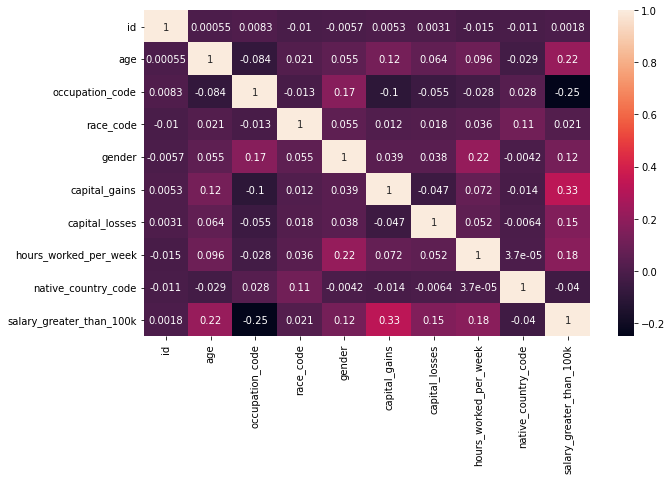

In [30]:
%matplotlib inline

corr_sal = df1.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_sal,annot = True)

#based on heatmap we can pick most correlated features
best_features = ['age','gender','hours_worked_per_week','capital_gains']
print('Best features :\t',best_features)

In [31]:
#dividing the first 20000
features_final2= features_final[0:20000]
features_final2.shape
salary2=salary[0:20000]

In [32]:
#last 3000 records for prediction
predictionvar=features_final[20000:23000]
print(predictionvar)
predictionvar.shape
salarypred=salary[20000:23000]

          id       age  occupation_code  race_code  gender  capital_gains  \
20000  20001  0.236111                6          3       1            0.0   
20001  20002  0.430556                3          3       1            0.0   
20002  20003  0.444444                1          3       0            0.0   
20003  20004  0.069444                3          3       0            0.0   
20004  20005  0.388889                6          1       1            0.0   
...      ...       ...              ...        ...     ...            ...   
22995  22996  0.305556                0          3       1            0.0   
22996  22997  0.013889               11          3       1            0.0   
22997  22998  0.416667                7          3       1            0.0   
22998  22999  0.027778                2          3       0            0.0   
22999  23000  0.291667                2          3       1            0.0   

       capital_losses  hours_worked_per_week  native_country_code  \
20000 

In [33]:
#spiltting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_final2,salary2, test_size=0.2, random_state=0)
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))


Training set has 16000 samples.
Testing set has 4000 samples.


In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.86
Accuracy of Logistic regression classifier on test set: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


In [36]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.78


In [37]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


#create Base classifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))



Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.85


In [38]:
#Create adaboost classifier
gnb_adaboost = AdaBoostClassifier(n_estimators= 50,base_estimator = gnb,learning_rate = 0.1)

#train adaboost classifier
model = gnb_adaboost.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)
#print(y_test[1])

#model acuracy
print('Accuracy : ',metrics.accuracy_score(y_test,y_pred))

#print('Accuracy of GNB classifier on training set: {:.2f}'
     #.format(gnb.score(X_train, y_train)))
#print('Accuracy of GNB classifier on test set: {:.2f}'
     #.format(gnb.score(X_test, y_test)))



Accuracy :  0.8755


In [39]:
#Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.81
Accuracy of SVM classifier on test set: 0.81


In [18]:
#prediction
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(pred)
#print(confusion_matrix(y_test, pred))
#print(classification_report(y_test, pred))

[0. 0. 0. ... 0. 0. 0.]


In [23]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred3 = gnb_adaboost.predict(X_test)
print(X_test.shape)
#print(confusion_matrix(y_test, pred))
#print(classification_report(y_test, pred))

(4000, 28)


In [40]:
#prediction for 3000
pred3 = gnb_adaboost.predict(predictionvar)
pred3 = pred3.astype(int)
print(pred3)

[0 0 0 ... 1 0 1]


In [41]:
predictionvar['Prediction'] = pred3
result_df = pd.DataFrame(predictionvar[['id','Prediction']])
print(result_df)
#result_df['result'] = result_df['id'].astype(str)+','+result_df['Prediction'].astype(str)
#df['Year'].astype(str) + df['quarter']
result_df.to_csv('Shan,Vaishnavi.csv', #columns = ['result']  ,
                  index=False, header=False)

          id  Prediction
20000  20001           0
20001  20002           0
20002  20003           0
20003  20004           0
20004  20005           0
...      ...         ...
22995  22996           0
22996  22997           0
22997  22998           1
22998  22999           0
22999  23000           1

[3000 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
